<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Clustering/2_%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Спектральная кластеризация

#### 1. Спектральная кластеризация

Спектральная кластеризация — это метод кластеризации, основанный на графах, который использует собственные векторы лапласиана графа, построенного на основе данных, для разделения данных на кластеры. Этот метод особенно эффективен для учета геометрической структуры данных и часто превосходит традиционные методы, такие как K-средних.

Алгоритм спектральной кластеризации состоит из двух основных шагов:

1. **Построение неориентированного взвешенного графа** на основе данных. Для заданного набора данных $\{x_i\}_{i=1}^n$ с попарными сходствами $w_{ij}$ строится лапласиан графа. Ненормализованный лапласиан $L$ определяется как:
$$
   L = D - W
$$
   где $W$ — матрица сходств с элементами $w_{ij}$, а $D$ — диагональная матрица степеней, где $D_{ii} = \sum_{j=1}^n w_{ij}$.

   Альтернативно, нормализованный лапласиан $L_{\text{sym}}$ определяется как:
$$
   L_{\text{sym}} = I - D^{-1/2}WD^{-1/2}
$$
   где $I$ — единичная матрица.

   Затем вычисляются собственные векторы $\phi_1, \phi_2, \ldots, \phi_k$, соответствующие наименьшим $k$ собственным значениям $L$ (или $L_{\text{sym}}$), т.е.:
$$
   L\phi_l = \lambda_l \phi_l
$$
   где $\{\phi_l\}_{l=1}^n$ образуют ортонормированный базис в $\mathbb{R}^n$, а собственные значения упорядочены как $\lambda_1 \leq \lambda_2 \leq \ldots \leq \lambda_n$.

   Пусть $\Phi \in \mathbb{R}^{n \times k}$ — матрица, столбцы которой являются собственными векторами $\phi_1, \phi_2, \ldots, \phi_k$. Каждая точка данных $x_i$ преобразуется в $k$-мерное пространство с помощью:
$$
   \Phi(x_i) = (\phi_1(x_i), \phi_2(x_i), \ldots, \phi_k(x_i))^T \in \mathbb{R}^k
$$
   Это преобразование отображает исходные данные из $\mathbb{R}^n$ в $\mathbb{R}^k$ с использованием собственных векторов лапласиана.

2. **Применение K-средних** к преобразованным данным $\Phi$ для разделения данных на $k$ кластеров.

#### 1.1 Выбор сходств $w_{ij}$

Выбор сходств $w_{ij}$ (весов на ребрах между узлами $x_i$ и $x_j$) является ключевым в спектральной кластеризации. Общее правило: чем больше $w_{ij}$, тем больше сходство между $x_i$ и $x_j$. Распространенные методы определения $w_{ij}$ включают:

- **Граф $\epsilon$-окрестности**:
$$
  w_{ij} =
  \begin{cases}
  1, & \text{если } \|x_i - x_j\| \leq \epsilon \\
  0, & \text{иначе}
  \end{cases}
$$
  Здесь $w_{ij} = 1$, если $x_i$ и $x_j$ находятся на расстоянии не более $\epsilon$; иначе $w_{ij} = 0$.

- **Полносвязный граф**:
$$
  w_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{\sigma^2}\right)
$$
  где $\sigma$ — параметр, контролирующий ширину окрестности. Если $x_i$ и $x_j$ близки, $w_{ij}$ близко к 1. Если они далеки друг от друга (относительно $\sigma$), $w_{ij}$ близко к 0.

#### 1.2 Применение спектральной кластеризации к несвязному графу

Для иллюстрации рассмотрим применение спектральной кластеризации к несвязному графу. Предположим, у нас есть неориентированный граф с весами $w_{ij}$ и $k$ связными компонентами $S_1, S_2, \ldots, S_k$.

После построения лапласиана графа $L$ и перестановки точек данных, $L$ может быть записан как блочно-диагональная матрица:
$$
L = \begin{pmatrix}
L_1 & 0 & \cdots & 0 \\
0 & L_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & L_k
\end{pmatrix}
$$
где каждый $L_i \in \mathbb{R}^{|S_i| \times |S_i|}$ — лапласиан для $i$-й связной компоненты.

Поскольку $L_i \mathbf{1}_{|S_i|} = 0$ для всех $1 \leq i \leq k$, где $\mathbf{1}_{|S_i|}$ — вектор из единиц длины $|S_i|$, наименьшие $k$ собственных значений $L$ равны нулю. Нулевое пространство $L$ порождается $k$ индикаторными функциями:
$$
\phi_1 = \frac{1}{\sqrt{|S_1|}} \mathbf{1}_{S_1}, \quad \phi_2 = \frac{1}{\sqrt{|S_2|}} \mathbf{1}_{S_2}, \quad \ldots, \quad \phi_k = \frac{1}{\sqrt{|S_k|}} \mathbf{1}_{S_k}
$$
где $\mathbf{1}_{S_i}$ — индикаторный вектор для $i$-й связной компоненты.

Матрица $\Phi$ тогда имеет вид:
$$
\Phi = \begin{pmatrix}
\frac{1}{\sqrt{|S_1|}} \mathbf{1}_{S_1} & 0 & \cdots & 0 \\
0 & \frac{1}{\sqrt{|S_2|}} \mathbf{1}_{S_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \frac{1}{\sqrt{|S_k|}} \mathbf{1}_{S_k}
\end{pmatrix} \in \mathbb{R}^{n \times k}
$$
Каждая строка $\Phi$ соответствует точке данных в одной из связных компонент, и спектральное отображение преобразует все точки в $i$-й связной компоненте $S_i$ в одну точку $\frac{1}{\sqrt{|S_i|}} e_i$, где $\{e_i\}_{i=1}^k$ — канонический базис в $\mathbb{R}^k$.

#### 1.3 Графовый разрез в спектральной кластеризации

Интуиция кластеризации заключается в разделении точек на группы на основе их сходства. Для данных, представленных в виде неориентированного графа с весами $W$, цель — найти разбиение, минимизирующее связи между разными группами. Это соответствует нахождению разреза на графе.

Для несвязного графа с весами $W$ можно найти разбиение, при котором связь между компонентами равна нулю. Спектральная кластеризация может быть выведена из понятия разреза графа.

**Определение разреза**: Для двух непересекающихся множеств вершин $S$ и $\overline{S}$ таких, что $S \cap \overline{S} = \emptyset$ и $S \cup \overline{S} = V$, разрез относительно $S$ определяется как:
$$
\text{cut}(S) = \sum_{i \in S, j \in \overline{S}} w_{ij}
$$
Это измеряет общий вес ребер, соединяющих $S$ и $\overline{S}$. Меньшее значение $\text{cut}(S)$ указывает на меньшее количество связей между $S$ и $\overline{S}$.

Однако минимизация $\text{cut}(S)$ может привести к несбалансированным разбиениям, например, выделению одной вершины в отдельный кластер. Чтобы избежать этого, вводятся **нормированный разрез** и **отношение разрезов**:

- **Отношение разрезов**:
$$
  \text{Rcut}(S) = \frac{\text{cut}(S)}{|S|} + \frac{\text{cut}(\overline{S})}{|\overline{S}|}
$$
  
- **Нормированный разрез**:
$$
  \text{Ncut}(S) = \frac{\text{cut}(S)}{\text{vol}(S)} + \frac{\text{cut}(\overline{S})}{\text{vol}(\overline{S})}
$$
  где $\text{vol}(S) = \sum_{i \in S} d_i = \sum_{i \in S} \sum_{j \in V} w_{ij}$ — объем множества $S$.

**Преимущества и недостатки**:
- **Преимущества**: $\text{Rcut}(S)$ и $\text{Ncut}(S)$ способствуют сбалансированным разбиениям, штрафуя разрезы, которые приводят к неравным размерам кластеров.
- **Недостатки**: Минимизация $\text{Rcut}(S)$ и $\text{Ncut}(S)$ является NP-трудной задачей, так как требует дискретной оптимизации по всем возможным подмножествам $V$. Полный перебор невозможен для больших графов из-за экспоненциального числа возможных разбиений.

На практике спектральная кластеризация предлагает релаксацию этих задач, решая непрерывную оптимизационную задачу с использованием собственных векторов лапласиана графа. Это позволяет эффективно находить приближенные решения.


### 1.3 Релаксация отношения разрезов (Ratio Cut)

Минимизация функции отношения разрезов (Ratio Cut) напрямую является сложной задачей, так как требует перебора всех возможных подмножеств $S \subseteq V$. Однако это не означает, что мы не можем аппроксимировать выражения (1) и (2) с помощью других оптимизационных задач, которые проще решать. Мы надеемся, что решения этих альтернативных задач дадут хорошие приближения для исходных задач.

В этом разделе мы покажем, что отношение разрезов (1) может быть аппроксимировано непрерывной оптимизационной задачей (задачей на собственные значения/векторы лапласиана $L$), которая точно соответствует первому шагу спектральной кластеризации. Начнем с связи отношения разрезов с квадратичной формой лапласиана $L$.

#### Связь отношения разрезов с квадратичной формой лапласиана

Рассмотрим функцию $f_S: V \to \mathbb{R}$, зависящую от множества $S$, определённую следующим образом:
$$
f_S(i) =
\begin{cases}
\sqrt{\frac{|\overline{S}|}{|V||S|}}, & \text{если } i \in S, \\
-\sqrt{\frac{|S|}{|V||\overline{S}|}}, & \text{если } i \in \overline{S}.
\end{cases}
$$
Эта функция является простой ступенчатой функцией на множестве вершин $V$, и, в частности, выполняется $f_S(i) = -f_S(j)$ для $i \in S$ и $j \in \overline{S}$.

**Лемма 1.** Для функции $f_S$, определённой в (5), выполняется:
$$
f_S^T L f_S = \text{Rcut}(S).
$$

**Доказательство:**
Доказательство достаточно простое. Рассмотрим квадратичную форму $f_S^T L f_S$:
$$
f_S^T L f_S = \frac{1}{2} \sum_{i,j} w_{ij} (f_S(i) - f_S(j))^2.
$$
Разделим сумму на две части: по рёбрам внутри $S$ и $\overline{S}$, и по рёбрам между $S$ и $\overline{S}$. Поскольку $f_S(i) = f_S(j)$ для $i, j \in S$ или $i, j \in \overline{S}$, вклад этих рёбер равен нулю. Таким образом, остаются только рёбра между $S$ и $\overline{S}$:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} (f_S(i) - f_S(j))^2.
$$
Подставим значения $f_S(i)$ и $f_S(j)$:
$$
f_S(i) - f_S(j) = \sqrt{\frac{|\overline{S}|}{|V||S|}} - \left(-\sqrt{\frac{|S|}{|V||\overline{S}|}}\right) = \sqrt{\frac{|\overline{S}|}{|V||S|}} + \sqrt{\frac{|S|}{|V||\overline{S}|}}.
$$
Возведём в квадрат:
$$
(f_S(i) - f_S(j))^2 = \left(\sqrt{\frac{|\overline{S}|}{|V||S|}} + \sqrt{\frac{|S|}{|V||\overline{S}|}}\right)^2 = \frac{|\overline{S}|}{|V||S|} + \frac{|S|}{|V||\overline{S}|} + 2 \cdot \frac{1}{|V|}.
$$
Подставим это обратно в сумму:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{|\overline{S}|}{|V||S|} + \frac{|S|}{|V||\overline{S}|} + \frac{2}{|V|}\right).
$$
Упростим выражение:
$$
f_S^T L f_S = \frac{1}{|V|} \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{|\overline{S}|}{|S|} + \frac{|S|}{|\overline{S}|} + 2\right).
$$
Заметим, что $|V| = |S| + |\overline{S}|$, и окончательно получаем:
$$
f_S^T L f_S = \text{Rcut}(S).
$$

#### Релаксация задачи минимизации отношения разрезов

До этого момента мы не упростили задачу минимизации (3), так как просто заменили выражение в (3) на $\min_{f_S} f_S^T L f_S$. Теперь идея состоит в том, чтобы расширить множество ограничений, исследуя свойства всех функций $\{f_S\}_{S \subseteq V}$.

Все функции $f_S$ обладают двумя общими свойствами:

**Лемма 2.** Для всех $S \subseteq V$ и функций $f_S$, определённых в (5), выполняются следующие свойства:
$$
\|f_S\|_2 = 1, \quad f_S^T \mathbf{1} = 0,
$$
где $\mathbf{1}$ — вектор из единиц.

**Доказательство:**
1. Норма $\|f_S\|_2$:
$$
\|f_S\|_2^2 = \sum_{i \in V} |f_S(i)|^2 = \sum_{i \in S} \frac{|\overline{S}|}{|V||S|} + \sum_{i \in \overline{S}} \frac{|S|}{|V||\overline{S}|} = \frac{|\overline{S}|}{|V|} + \frac{|S|}{|V|} = 1.
$$
2. Ортогональность к $\mathbf{1}$:
$$
f_S^T \mathbf{1} = \sum_{i \in V} f_S(i) = \sum_{i \in S} f_S(i) + \sum_{i \in \overline{S}} f_S(i) = \sqrt{\frac{|\overline{S}|}{|V||S|}} \cdot |S| - \sqrt{\frac{|S|}{|V||\overline{S}|}} \cdot |\overline{S}| = 0.
$$

#### Релаксация задачи

Теперь мы заменяем исходную задачу (3) на следующую:
$$
\min_{f} f^T L f, \quad \text{при условиях} \quad \|f\|_2 = 1, \quad f^T \mathbf{1} = 0.
$$
Заметим, что $\{f_S\}_{S \subseteq V} \subseteq \{f: \|f\|_2 = 1, f^T \mathbf{1} = 0\}$. Таким образом, задача (7) минимизирует $f^T L f$ на более широком множестве, чем $f_S$, и мы надеемся получить приближённое решение из этого подхода. Более того, задача (7) гораздо проще решается, так как она непосредственно соответствует задаче на собственные значения/векторы лапласиана $L$, что точно совпадает с первым шагом спектральной кластеризации. Мы называем (7) **релаксацией** задачи (3).


### 1.4 Релаксация нормированного разреза (Normalized Cut)

Как и в случае с отношением разрезов (Ratio Cut), нормированный разрез (Normalized Cut) также может быть аппроксимирован с помощью релаксации. Рассмотрим функцию $f_S: V \to \mathbb{R}$, определённую следующим образом:

$$
f_S(i) =
\begin{cases}
\sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}}, & \text{если } i \in S, \\
-\sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}, & \text{если } i \in \overline{S}.
\end{cases}
$$

Эта функция аналогична функции, определённой в (5), но вместо мощностей множеств $|S|$ и $|\overline{S}|$ используются их объёмы $\text{vol}(S)$ и $\text{vol}(\overline{S})$. Объём множества $S$ определяется как:
$$
\text{vol}(S) = \sum_{i \in S} d_i,
$$
где $d_i = \sum_{j \in V} w_{ij}$ — степень вершины $i$.

#### Связь нормированного разреза с квадратичной формой лапласиана

Аналогично отношению разрезов, можно показать, что квадратичная форма $f_S^T L f_S$ связана с нормированным разрезом.

**Лемма 3.** Для функции $f_S$, определённой в (8), выполняется:
$$
f_S^T L f_S = \text{Ncut}(S).
$$

**Доказательство:**
Доказательство аналогично доказательству для отношения разрезов. Рассмотрим квадратичную форму $f_S^T L f_S$:
$$
f_S^T L f_S = \frac{1}{2} \sum_{i,j} w_{ij} (f_S(i) - f_S(j))^2.
$$
Разделим сумму на две части: по рёбрам внутри $S$ и $\overline{S}$, и по рёбрам между $S$ и $\overline{S}$. Поскольку $f_S(i) = f_S(j)$ для $i, j \in S$ или $i, j \in \overline{S}$, вклад этих рёбер равен нулю. Таким образом, остаются только рёбра между $S$ и $\overline{S}$:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} (f_S(i) - f_S(j))^2.
$$
Подставим значения $f_S(i)$ и $f_S(j)$:
$$
f_S(i) - f_S(j) = \sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} - \left(-\sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}\right) = \sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} + \sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}.
$$
Возведём в квадрат:
$$
(f_S(i) - f_S(j))^2 = \left(\sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} + \sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}\right)^2 = \frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})} + 2 \cdot \frac{1}{\text{vol}(V)}.
$$
Подставим это обратно в сумму:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})} + \frac{2}{\text{vol}(V)}\right).
$$
Упростим выражение:
$$
f_S^T L f_S = \frac{1}{\text{vol}(V)} \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{\text{vol}(\overline{S})}{\text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(\overline{S})} + 2\right).
$$
Заметим, что $\text{vol}(V) = \text{vol}(S) + \text{vol}(\overline{S})$, и окончательно получаем:
$$
f_S^T L f_S = \text{Ncut}(S).
$$

#### Релаксация задачи минимизации нормированного разреза

Аналогично отношению разрезов, мы можем заменить исходную задачу минимизации нормированного разреза на следующую:
$$
\min_{f} f^T L f, \quad \text{при условиях} \quad \|f\|_2 = 1, \quad f^T D^{1/2} \mathbf{1} = 0.
$$
Здесь $D$ — диагональная матрица степеней, а $D^{1/2}$ — её квадратный корень. Условие $f^T D^{1/2} \mathbf{1} = 0$ гарантирует, что функция $f$ ортогональна вектору $D^{1/2} \mathbf{1}$.

#### Минимизатор задачи релаксации

Минимизатором задачи (7) является собственный вектор $\phi_2$, соответствующий второму наименьшему собственному значению $\lambda_2$ лапласиана $L$. Другими словами, минимум задачи (7) равен $\lambda_2$.

**Доказательство:**
Рассмотрим разложение функции $f$ по собственным векторам лапласиана $L$:
$$
f = \sum_{l=1}^n \alpha_l \phi_l,
$$
где $\{\phi_l\}_{l=1}^n$ — ортонормированные собственные векторы $L$, соответствующие собственным значениям $\lambda_1 \leq \lambda_2 \leq \ldots \leq \lambda_n$. Тогда:
$$
f^T L f = \sum_{l=1}^n \lambda_l \alpha_l^2.
$$
Поскольку $\|f\|_2 = 1$, выполняется $\sum_{l=1}^n \alpha_l^2 = 1$. Минимум $f^T L f$ достигается, когда $\alpha_2 = 1$, а все остальные $\alpha_l = 0$, то есть $f = \phi_2$. Таким образом, минимум равен $\lambda_2$.

#### Сравнение с исходной задачей

По сравнению с исходной задачей (3), мы знаем, что $\{f_S\}_{S \subseteq V} \subseteq \{f: \|f\|_2 = 1, f^T \mathbf{1} = 0\}$, и, следовательно:
$$
\text{Rcut}(S) \geq \lambda_2, \quad \min_{S \subseteq V} \text{Rcut}(S) \geq \lambda_2.
$$

#### Как получить кластеризацию на основе $\phi_2$?

Для получения кластеризации на основе собственного вектора $\phi_2$ можно применить метод K-средних. Это эквивалентно установлению порога $r$, такого что:
$$
\phi_2(i) > r \implies i \in S, \quad \phi_2(i) \leq r \implies i \in \overline{S}.
$$
Этот процесс также называется процедурой "округления".


 ### 1.4 Релаксация нормированного разреза (Normalized Cut)

Как и в случае с отношением разрезов (Ratio Cut), нормированный разрез (Normalized Cut) также может быть аппроксимирован с помощью релаксации. Рассмотрим функцию $f_S: V \to \mathbb{R}$, определённую следующим образом:

$$
f_S(i) =
\begin{cases}
\sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}}, & \text{если } i \in S, \\
-\sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}, & \text{если } i \in \overline{S}.
\end{cases}
$$

Эта функция аналогична функции, определённой в (5), но вместо мощностей множеств $|S|$ и $|\overline{S}|$ используются их объёмы $\text{vol}(S)$ и $\text{vol}(\overline{S})$. Объём множества $S$ определяется как:
$$
\text{vol}(S) = \sum_{i \in S} d_i,
$$
где $d_i = \sum_{j \in V} w_{ij}$ — степень вершины $i$.

#### Связь нормированного разреза с квадратичной формой лапласиана

Аналогично отношению разрезов, можно показать, что квадратичная форма $f_S^T L f_S$ связана с нормированным разрезом.

**Лемма 4.** Для функции $f_S$, определённой в (8), выполняется:
$$
f_S^T L f_S = \text{Ncut}(S).
$$

**Доказательство:**
Доказательство аналогично доказательству для отношения разрезов. Рассмотрим квадратичную форму $f_S^T L f_S$:
$$
f_S^T L f_S = \frac{1}{2} \sum_{i,j} w_{ij} (f_S(i) - f_S(j))^2.
$$
Разделим сумму на две части: по рёбрам внутри $S$ и $\overline{S}$, и по рёбрам между $S$ и $\overline{S}$. Поскольку $f_S(i) = f_S(j)$ для $i, j \in S$ или $i, j \in \overline{S}$, вклад этих рёбер равен нулю. Таким образом, остаются только рёбра между $S$ и $\overline{S}$:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} (f_S(i) - f_S(j))^2.
$$
Подставим значения $f_S(i)$ и $f_S(j)$:
$$
f_S(i) - f_S(j) = \sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} - \left(-\sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}\right) = \sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} + \sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}.
$$
Возведём в квадрат:
$$
(f_S(i) - f_S(j))^2 = \left(\sqrt{\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)}} + \sqrt{\frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})}}\right)^2 = \frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})} + 2 \cdot \frac{1}{\text{vol}(V)}.
$$
Подставим это обратно в сумму:
$$
f_S^T L f_S = \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{\text{vol}(\overline{S})}{\text{vol}(V) \text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(V) \text{vol}(\overline{S})} + \frac{2}{\text{vol}(V)}\right).
$$
Упростим выражение:
$$
f_S^T L f_S = \frac{1}{\text{vol}(V)} \sum_{i \in S, j \in \overline{S}} w_{ij} \left(\frac{\text{vol}(\overline{S})}{\text{vol}(S)} + \frac{\text{vol}(S)}{\text{vol}(\overline{S})} + 2\right).
$$
Заметим, что $\text{vol}(V) = \text{vol}(S) + \text{vol}(\overline{S})$, и окончательно получаем:
$$
f_S^T L f_S = \text{Ncut}(S).
$$

#### Релаксация задачи минимизации нормированного разреза

Аналогично отношению разрезов, мы можем заменить исходную задачу минимизации нормированного разреза на следующую:
$$
\min_{f} f^T L f, \quad \text{при условиях} \quad f^T D f = 1, \quad f^T D \mathbf{1} = 0.
$$
Здесь $D$ — диагональная матрица степеней, а $\mathbf{1}$ — вектор из единиц. Условие $f^T D \mathbf{1} = 0$ гарантирует, что функция $f$ ортогональна вектору $D \mathbf{1}$.

#### Минимизатор задачи релаксации

Минимизатором задачи (11) является собственный вектор $\phi_2$, соответствующий второму наименьшему собственному значению $\lambda_2$ нормализованного лапласиана $L_{\text{sym}} = I - D^{-1/2} W D^{-1/2}$. Другими словами, минимум задачи (11) равен $\lambda_2$.

**Доказательство:**
Рассмотрим разложение функции $f$ по собственным векторам нормализованного лапласиана $L_{\text{sym}}$:
$$
f = \sum_{l=1}^n \alpha_l \phi_l,
$$
где $\{\phi_l\}_{l=1}^n$ — ортонормированные собственные векторы $L_{\text{sym}}$, соответствующие собственным значениям $\lambda_1 \leq \lambda_2 \leq \ldots \leq \lambda_n$. Тогда:
$$
f^T L_{\text{sym}} f = \sum_{l=1}^n \lambda_l \alpha_l^2.
$$
Поскольку $\|f\|_2 = 1$, выполняется $\sum_{l=1}^n \alpha_l^2 = 1$. Минимум $f^T L_{\text{sym}} f$ достигается, когда $\alpha_2 = 1$, а все остальные $\alpha_l = 0$, то есть $f = \phi_2$. Таким образом, минимум равен $\lambda_2$.

#### Сравнение с исходной задачей

По сравнению с исходной задачей (4), мы знаем, что $\{f_S\}_{S \subseteq V} \subseteq \{f: f^T D f = 1, f^T D \mathbf{1} = 0\}$, и, следовательно:
$$
\text{Ncut}(S) \geq \lambda_2, \quad \min_{S \subseteq V} \text{Ncut}(S) \geq \lambda_2.
$$

#### Как получить кластеризацию на основе $\phi_2$?

Для получения кластеризации на основе собственного вектора $\phi_2$ можно применить метод K-средних. Это эквивалентно установлению порога $r$, такого что:
$$
\phi_2(i) > r \implies i \in S, \quad \phi_2(i) \leq r \implies i \in \overline{S}.
$$
Этот процесс также называется процедурой "округления".

#### Заключение

Релаксация задачи минимизации нормированного разреза позволяет свести исходную комбинаторную задачу к задаче на собственные значения, которая эффективно решается с использованием методов линейной алгебры. Это является ключевым шагом в спектральной кластеризации, так как позволяет находить приближённые решения для сложных задач кластеризации.

### 1.5 Сравнение методов

В заключение:
- Релаксация отношения разрезов соответствует задаче на собственные значения и собственные векторы лапласиана $L = D - W$.
- Релаксация нормированного разреза соответствует задаче на собственные значения и собственные векторы нормализованного лапласиана $L_{\text{sym}} = I - D^{-1/2} W D^{-1/2}$.
- Все эти результаты могут быть легко обобщены на случай многоклассовой кластеризации.

#### Какой алгоритм лучше?

Эмпирически, нормированный разрез (Ncut) является более предпочтительным выбором. Однако если граф регулярный (все степени вершин $d_i$ одинаковы), то оба метода эквивалентны.

Цель кластеризации заключается не только в минимизации разреза, но и в максимизации связности внутри кластеров. Внутрикластерная связность (association) определяется как:
$$
\text{assoc}(S, S) = \sum_{i \in S, j \in S} w_{ij} = \sum_{i \in S, j \in V} w_{ij} - \sum_{i \in S, j \in \overline{S}} w_{ij} = \text{vol}(S) - \text{cut}(S).
$$
Таким образом, мы хотим минимизировать $\text{cut}(S)$ и максимизировать $\text{vol}(S)$, что именно и делает нормированный разрез.



 Рассмотрим конкретный числовой пример спектральной кластеризации на основе описанного выше алгоритма. Мы будем использовать небольшой набор данных и шаг за шагом пройдем через процесс спектральной кластеризации.

### Исходные данные
Пусть у нас есть набор из 4 точек в двумерном пространстве:
$$
X = \begin{pmatrix}
1 & 1 \\
1 & 2 \\
4 & 4 \\
4 & 5
\end{pmatrix}
$$
Мы хотим разделить эти точки на 2 кластера.

### Шаг 1: Построение матрицы сходства $W$
Используем полносвязный граф с гауссовым ядром для вычисления сходства между точками. Формула для сходства:
$$
w_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{\sigma^2}\right)
$$
Выберем $\sigma = 1$ для простоты.

Вычислим попарные расстояния между точками:
$$
\|x_1 - x_2\| = \sqrt{(1-1)^2 + (1-2)^2} = 1 \\
\|x_1 - x_3\| = \sqrt{(1-4)^2 + (1-4)^2} = \sqrt{18} \approx 4.24 \\
\|x_1 - x_4\| = \sqrt{(1-4)^2 + (1-5)^2} = \sqrt{25} = 5 \\
\|x_2 - x_3\| = \sqrt{(1-4)^2 + (2-4)^2} = \sqrt{13} \approx 3.61 \\
\|x_2 - x_4\| = \sqrt{(1-4)^2 + (2-5)^2} = \sqrt{18} \approx 4.24 \\
\|x_3 - x_4\| = \sqrt{(4-4)^2 + (4-5)^2} = 1
$$

Теперь вычислим матрицу сходства $W$:
$$
W = \begin{pmatrix}
1 & e^{-1} & e^{-18} & e^{-25} \\
e^{-1} & 1 & e^{-13} & e^{-18} \\
e^{-18} & e^{-13} & 1 & e^{-1} \\
e^{-25} & e^{-18} & e^{-1} & 1
\end{pmatrix}
$$
Приближенно:
$$
W \approx \begin{pmatrix}
1 & 0.37 & 0 & 0 \\
0.37 & 1 & 0 & 0 \\
0 & 0 & 1 & 0.37 \\
0 & 0 & 0.37 & 1
\end{pmatrix}
$$

### Шаг 2: Построение матрицы степеней $D$
Матрица степеней $D$ — это диагональная матрица, где каждый элемент $D_{ii}$ равен сумме элементов строки $i$ матрицы $W$:
$$
D = \begin{pmatrix}
1.37 & 0 & 0 & 0 \\
0 & 1.37 & 0 & 0 \\
0 & 0 & 1.37 & 0 \\
0 & 0 & 0 & 1.37
\end{pmatrix}
$$

### Шаг 3: Построение лапласиана $L$
Ненормализованный лапласиан $L$ вычисляется как:
$$
L = D - W
$$
Подставляем значения:
$$
L = \begin{pmatrix}
1.37 & 0 & 0 & 0 \\
0 & 1.37 & 0 & 0 \\
0 & 0 & 1.37 & 0 \\
0 & 0 & 0 & 1.37
\end{pmatrix} - \begin{pmatrix}
1 & 0.37 & 0 & 0 \\
0.37 & 1 & 0 & 0 \\
0 & 0 & 1 & 0.37 \\
0 & 0 & 0.37 & 1
\end{pmatrix} = \begin{pmatrix}
0.37 & -0.37 & 0 & 0 \\
-0.37 & 0.37 & 0 & 0 \\
0 & 0 & 0.37 & -0.37 \\
0 & 0 & -0.37 & 0.37
\end{pmatrix}
$$

### Шаг 4: Вычисление собственных значений и собственных векторов
Теперь найдем собственные значения и собственные векторы матрицы $L$. Собственные значения $\lambda$ и собственные векторы $\phi$ удовлетворяют уравнению:
$$
L\phi = \lambda\phi
$$

Для нашей матрицы $L$ собственные значения и собственные векторы:
$$
\lambda_1 = 0, \quad \phi_1 = \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} \\
\lambda_2 = 0.74, \quad \phi_2 = \begin{pmatrix} 1 \\ -1 \\ 0 \\ 0 \end{pmatrix} \\
\lambda_3 = 0.74, \quad \phi_3 = \begin{pmatrix} 0 \\ 0 \\ 1 \\ -1 \end{pmatrix} \\
\lambda_4 = 1.48, \quad \phi_4 = \begin{pmatrix} 1 \\ 1 \\ -1 \\ -1 \end{pmatrix}
$$

### Шаг 5: Преобразование данных
Выберем первые два собственных вектора, соответствующие наименьшим ненулевым собственным значениям ($\phi_2$ и $\phi_3$), и построим матрицу $\Phi$:
$$
\Phi = \begin{pmatrix}
1 & 0 \\
-1 & 0 \\
0 & 1 \\
0 & -1
\end{pmatrix}
$$

### Шаг 6: Применение K-средних
Теперь применим алгоритм K-средних к строкам матрицы $\Phi$ для разделения данных на 2 кластера. В данном случае строки матрицы $\Phi$ уже явно разделены на две группы:
- Кластер 1: точки 1 и 2 ($\begin{pmatrix}1 & 0\end{pmatrix}$ и $\begin{pmatrix}-1 & 0\end{pmatrix}$)
- Кластер 2: точки 3 и 4 ($\begin{pmatrix}0 & 1\end{pmatrix}$ и $\begin{pmatrix}0 & -1\end{pmatrix}$)

### Результат
Исходные данные разделены на два кластера:
- Кластер 1: точки $(1, 1)$ и $(1, 2)$
- Кластер 2: точки $(4, 4)$ и $(4, 5)$

Этот пример демонстрирует, как спектральная кластеризация может эффективно разделить данные на кластеры, используя геометрическую структуру данных.


 Реализуем спектральную кластеризацию на Python с использованием библиотек `numpy`, `scipy`, `sklearn` и `matplotlib` для визуализации. Мы будем использовать тот же пример данных, что и в предыдущем объяснении.

### Код на Python





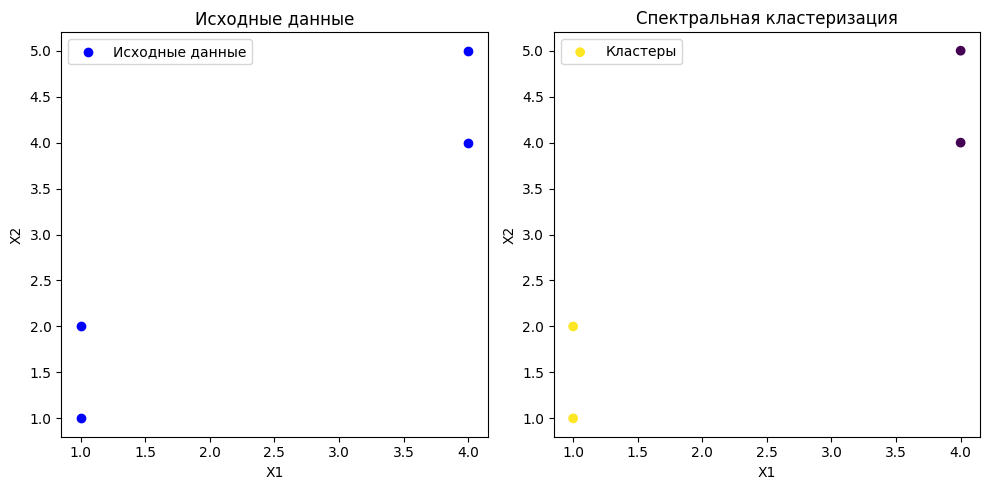

In [1]:
import numpy as np
from scipy.linalg import eigh
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Исходные данные
X = np.array([[1, 1],
              [1, 2],
              [4, 4],
              [4, 5]])

# Функция для вычисления матрицы сходства (гауссово ядро)
def compute_similarity_matrix(X, sigma=1.0):
    n = X.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = np.exp(-np.linalg.norm(X[i] - X[j])**2 / (2 * sigma**2))
    return W

# Функция для построения лапласиана
def compute_laplacian(W):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    return L

# Вычисляем матрицу сходства
W = compute_similarity_matrix(X, sigma=1.0)

# Вычисляем лапласиан
L = compute_laplacian(W)

# Вычисляем собственные значения и собственные векторы
eigenvalues, eigenvectors = eigh(L)

# Выбираем первые k собственных векторов (k=2)
k = 2
phi = eigenvectors[:, :k]

# Применяем K-средних к собственным векторам
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(phi)

# Визуализация исходных данных и кластеров
plt.figure(figsize=(10, 5))

# Визуализация исходных данных
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Исходные данные')
plt.title('Исходные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Визуализация кластеров
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Кластеры')
plt.title('Спектральная кластеризация')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()